## Dataset split using `os.symlink()`

When working with large datasets consisting of separate files, we can manage dataset splits with symbolic links, essentially creating shortcuts to original files according to a desired split ratio.

The advantage is we don't need to copy or move files around, as these operations require extra computation and memory usage.  

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

%matplotlib inline

print(os.getcwd())

datapath = "images/"

c:\Users\tomas\Desktop\ip102_v1.1


In [2]:
# read category from filename
filename = "0_00213.jpg"
category = filename.split("_")[0]
print(category)

0


### Get labels

In [3]:
# read in `classes.txt.txt` with proper class names into a dict.
# these could do with a bit of sanitation.
labels = {}

with open('classes.txt.txt') as f:
    for line in f:
        # remove lead/trailing whitespace 
        stripped = line.strip()
        # collect the parts of the names together with *
        head, *rest = stripped.split()

        # we can do -1 here since our images are classed 0-101
        key = int(head) -1
        
        val = rest
        # join the names with an underscore
        labels[key] = '_'.join(val)

labels

{0: 'rice_leaf_roller',
 1: 'rice_leaf_caterpillar',
 2: 'paddy_stem_maggot',
 3: 'asiatic_rice_borer',
 4: 'yellow_rice_borer',
 5: 'rice_gall_midge',
 6: 'Rice_Stemfly',
 7: 'brown_plant_hopper',
 8: 'white_backed_plant_hopper',
 9: 'small_brown_plant_hopper',
 10: 'rice_water_weevil',
 11: 'rice_leafhopper',
 12: 'grain_spreader_thrips',
 13: 'rice_shell_pest',
 14: 'grub',
 15: 'mole_cricket',
 16: 'wireworm',
 17: 'white_margined_moth',
 18: 'black_cutworm',
 19: 'large_cutworm',
 20: 'yellow_cutworm',
 21: 'red_spider',
 22: 'corn_borer',
 23: 'army_worm',
 24: 'aphids',
 25: 'Potosiabre_vitarsis',
 26: 'peach_borer',
 27: 'english_grain_aphid',
 28: 'green_bug',
 29: 'bird_cherry-oataphid',
 30: 'wheat_blossom_midge',
 31: 'penthaleus_major',
 32: 'longlegged_spider_mite',
 33: 'wheat_phloeothrips',
 34: 'wheat_sawfly',
 35: 'cerodonta_denticornis',
 36: 'beet_fly',
 37: 'flea_beetle',
 38: 'cabbage_army_worm',
 39: 'beet_army_worm',
 40: 'Beet_spot_flies',
 41: 'meadow_moth',
 

In [4]:
# alternatively the dictionary comprehension way
with open("classes.txt.txt") as f:
    a = {int(k)-1: '_'.join(v.split()) for line in f for (k,v) in [line.strip().split(None, 1)]}
a

{0: 'rice_leaf_roller',
 1: 'rice_leaf_caterpillar',
 2: 'paddy_stem_maggot',
 3: 'asiatic_rice_borer',
 4: 'yellow_rice_borer',
 5: 'rice_gall_midge',
 6: 'Rice_Stemfly',
 7: 'brown_plant_hopper',
 8: 'white_backed_plant_hopper',
 9: 'small_brown_plant_hopper',
 10: 'rice_water_weevil',
 11: 'rice_leafhopper',
 12: 'grain_spreader_thrips',
 13: 'rice_shell_pest',
 14: 'grub',
 15: 'mole_cricket',
 16: 'wireworm',
 17: 'white_margined_moth',
 18: 'black_cutworm',
 19: 'large_cutworm',
 20: 'yellow_cutworm',
 21: 'red_spider',
 22: 'corn_borer',
 23: 'army_worm',
 24: 'aphids',
 25: 'Potosiabre_vitarsis',
 26: 'peach_borer',
 27: 'english_grain_aphid',
 28: 'green_bug',
 29: 'bird_cherry-oataphid',
 30: 'wheat_blossom_midge',
 31: 'penthaleus_major',
 32: 'longlegged_spider_mite',
 33: 'wheat_phloeothrips',
 34: 'wheat_sawfly',
 35: 'cerodonta_denticornis',
 36: 'beet_fly',
 37: 'flea_beetle',
 38: 'cabbage_army_worm',
 39: 'beet_army_worm',
 40: 'Beet_spot_flies',
 41: 'meadow_moth',
 

### Data exploration & split 

- read original splits from .csvs and select matching filenames
- custom split:
    * get lengths of each class subset (# of samples per label)
    * 

In [14]:
# https://github.com/MLWhiz/data_science_blogs/blob/master/compvisblog/Boats_DataExploration.ipynb

# print(labels)

file_list = [] 
for (dirpath, dirnames, filenames) in os.walk(datapath):
    file_list.extend(filenames)

# # or
# images = []
# for image in os.listdir(datapath):
#     images.append(image)

# print(len(images))
# print(images[0], images[-1])

In [6]:
# dict with filename as key, class as value
images = {}
for image in os.listdir(datapath):
    (val, key) = image.split("_")
    images[key] = val

# get file counts per class
from collections import Counter

images_per_class = Counter(images.values())

# accessing particular class 
counts_20 = images_per_class['20']

#print(counts_20, '\n')
#print(images_per_class)

# sort descending according to count

sorted_desc = sorted(images_per_class.items(), key=lambda x:x[1], reverse = True)

df = pd.DataFrame(sorted_desc, columns=["classID","Image count"])

df

,classID,Image count
0,101,5740
1,67,5310
2,70,5081
3,24,4094
4,51,1897
...,...,...
97,98,93
98,63,84
99,61,79
100,80,74


<AxesSubplot:title={'center':'IP102, images per target class'}>

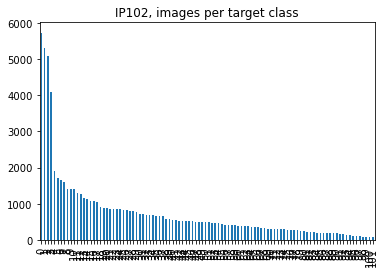

In [7]:
df["Image count"].plot.bar(title="IP102, images per target class")


### custom data split

In [ ]:
# set target ratios for split. E.g., train=0.75, val=0.15, test=0.10.

# calculate the length of each subset. E.g., train_length =  0.75 * len(entire set)

# do a stratified sample of the desired size for each subset. for example sklearn Subset??
# https://discuss.pytorch.org/t/how-to-split-dataset-into-test-and-validation-sets/33987/5

### original data split from .csvs

In [19]:
# read in filenames from csvs containing original data splits

train_files = []
with open('train.txt') as f:
    for line in f:
        train_files.append(line.split(" ")[0])

val_files = []
with open('val.txt') as f:
    for line in f:
        val_files.append(line.split(" ")[0])

test_files = []
with open('test.txt') as f:
    for line in f:
        test_files.append(line.split(" ")[0])

print("length of training subset:", len(train_files))
print("length of validation subset:", len(val_files))
print("length of test subset:", len(test_files))        

length of training subset: 45095
length of validation subset: 7508
length of test subset: 22619


In [32]:
# get paths of images in each subset by matching filenames 
# get rid of class prefix here with .split("_")[1]
stripped_filenames = {file.split("_")[1] for file in file_list}

matches = []
for file in train_files:
    if file in stripped_filenames:
        print('found', file)
        matches.append(file)
print(len(matches))

found 00002.jpg
found 00003.jpg
found 00005.jpg
found 00006.jpg
found 00008.jpg
found 00011.jpg
found 00015.jpg
found 00017.jpg
found 00018.jpg
found 00019.jpg
found 00020.jpg
found 00021.jpg
found 00022.jpg
found 00024.jpg
found 00025.jpg
found 00027.jpg
found 00028.jpg
found 00029.jpg
found 00030.jpg
found 00031.jpg
found 00032.jpg
found 00033.jpg
found 00037.jpg
found 00038.jpg
found 00040.jpg
found 00041.jpg
found 00042.jpg
found 00043.jpg
found 00045.jpg
found 00047.jpg
found 00048.jpg
found 00050.jpg
found 00052.jpg
found 00053.jpg
found 00055.jpg
found 00056.jpg
found 00057.jpg
found 00060.jpg
found 00062.jpg
found 00064.jpg
found 00065.jpg
found 00068.jpg
found 00069.jpg
found 00072.jpg
found 00073.jpg
found 00074.jpg
found 00076.jpg
found 00077.jpg
found 00078.jpg
found 00080.jpg
found 00081.jpg
found 00083.jpg
found 00084.jpg
found 00085.jpg
found 00086.jpg
found 00087.jpg
found 00088.jpg
found 00089.jpg
found 00091.jpg
found 00092.jpg
found 00093.jpg
found 00095.jpg
found 00

### creating symlinks

In [4]:
# create folder structure to hold split sets
dataset = "split/"
#os.mkdir(dataset)

dirs = ["train", "test", "val"]

train_path = os.path.join(dataset, "train")
val_path = os.path.join(dataset, "val")
test_path = os.path.join(dataset, "test")

##os.mkdir(train_path)
#os.mkdir(val_path)
#os.mkdir(test_path)

- Make folders for each class in each dataset folder
- using `os.symlink()`, add links to original files in corresponding class folder in each dataset folder

functionalised making of symlinks

- (locally tested) Now properly creates split/phase/class folders in the right place and symlink for provided source file.

- `create_link(src, phase)`
-  `src` being an absolute path, `phase` being a string of 'train', 'val' or 'test'

In [27]:
dataset = "split/"
os.mkdir(dataset)
src_abs = os.path.abspath(src)


def create_link(src, phase):

    # check src
    if os.path.isfile(src):
        print('source exists')
        base_path = os.path.relpath(dataset)

        print("base_path: ", base_path)
        
        
        # determine class index from filename
        head_tail = os.path.split(src)

        label_index = int(head_tail[1].split('_')[0])
        print(label_index)

        img_filename_only = head_tail[1]

        labelname = labels[label_index]
        print('class index of source: {}, labelname: {}'.format(label_index, labelname))
        phase_path = os.path.join(base_path, phase)
        print("phase path: '%s'" % phase_path)

        # if phase path doesn't exist, it needs to be made
        if not os.path.isdir(phase_path):
            print("making phase directory...")
            os.mkdir(phase_path)

        dest_folder_path = os.path.join(phase_path, labelname)
        print("dest folder path: {}, is abs: {}".format(dest_folder_path, os.path.isabs(dest_folder_path)))

        # if destination folder doesn't exist, make it
        if not os.path.exists(dest_folder_path):
             print("making class directory...")
             os.mkdir(dest_folder_path)
        
        # create destination path
        link_path = os.path.join(dest_folder_path, img_filename_only)
        link_path = os.path.relpath(link_path)
        print("link path:", link_path)
        
        # make link
        print("making symlink at", link_path)
        os.symlink(src, link_path)
        

    else:
        print('src file not found')


create_link(src_abs, "train")

source exists
base_path:  split
0
class index of source: 0, labelname: rice_leaf_roller
phase path: 'split\train'
making phase directory...
dest folder path: split\train\rice_leaf_roller, is abs: False
making class directory...
link path: split\train\rice_leaf_roller\0_00005.jpg
making symlink at split\train\rice_leaf_roller\0_00005.jpg
